Project-1st
Netflix Data: Cleaning, Analysis and Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
data=pd.read_csv('/content/netflix1.csv')

In [ ]:
#read the data
print(data)

     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   duration  \
0     United States 

In [ ]:
#display rows of the dataset
data.index


RangeIndex(start=0, stop=8790, step=1)

In [ ]:
#display columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
#display dimensions
data.shape

(8790, 10)

In [ ]:
#display basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
#clean the dataset
#checking null values
print(data.isnull().sum())
print(data)

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                          

In [ ]:
#check duplicate values if any
data.drop_duplicates(inplace=True)
print(data)

     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   duration  \
0     United States 

In [ ]:
#count the number of Tv shows and Movies
count=data['type'].value_counts()
print(count)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


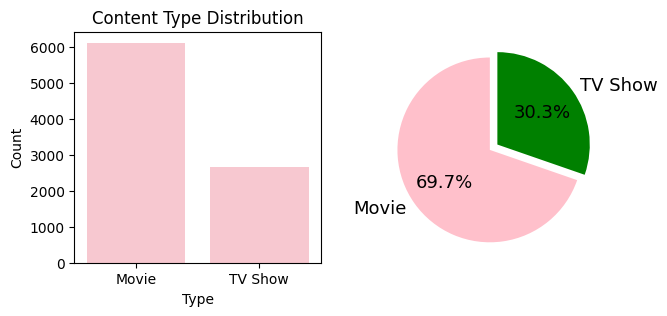

In [ ]:

# Assuming count contains values like:
# Movie: 3500, TV Show: 1500
count = count  # already defined somewhere in your code

plt.figure(figsize=(7, 3))

# Barplot
plt.subplot(1, 2, 1)
sns.barplot(x=count.index, y=count.values, color='pink')
plt.title("Content Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(count.values,
        labels=['Movie', 'TV Show'],
        autopct='%0.1f%%',
        explode=[0.05, 0.05],
        colors=['pink', 'green'],
        startangle=90,
        textprops={'fontsize': 13},
        wedgeprops={'linewidth': 2}
        )
plt.show()


In [ ]:
data['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


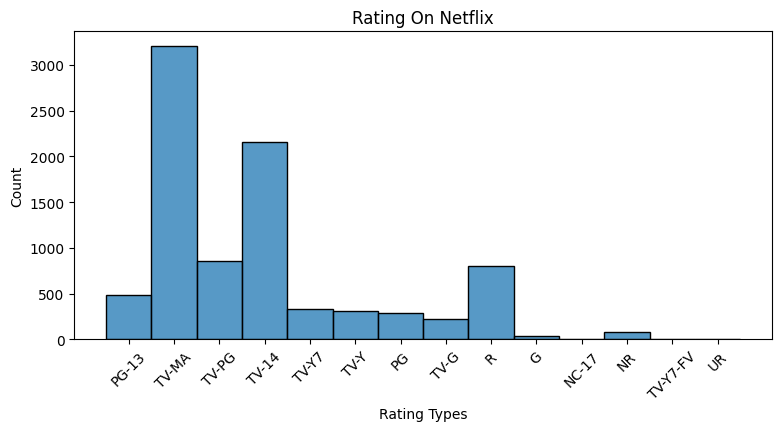

In [ ]:
#Visual Representation of the rating of movies and TV Show
ratings=data['rating'].value_counts().reset_index().sort_values(by='count',ascending=False)
plt.figure( figsize=(9,4))
sns.histplot(data['rating'])
plt.title('Rating On Netflix')
plt.xticks(rotation=45)
plt.xlabel('Rating Types')
plt.ylabel('Count')
plt.show()

In [ ]:
#CONVERTING Date_added column to DateTime
data['date_added']=pd.to_datetime(data['date_added'])

In [ ]:
data.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


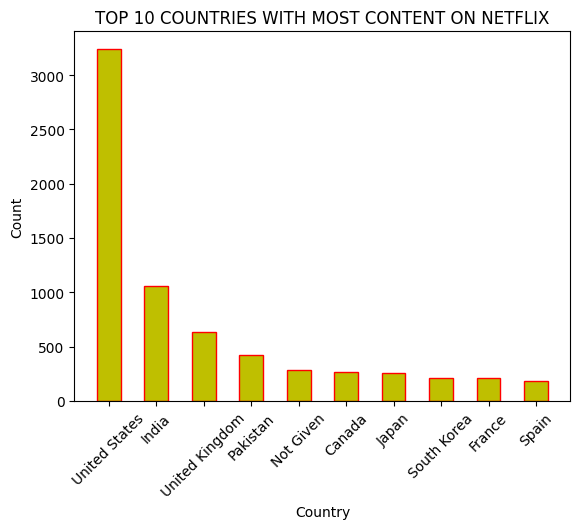

In [ ]:
#TOP 10 COUNTRIES WITH MOST CONTENT ON NETFLIX
topten=data['country'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)
plt.bar(topten['country'],width=0.5,color='y',edgecolor='r',height=topten['count'])
plt.title("TOP 10 COUNTRIES WITH MOST CONTENT ON NETFLIX")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [ ]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day
data.describe()

,date_added,release_year,year,month,day
count,8790,8790.000000,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,2018.873606,6.655859,12.500000
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000,1.000000
50%,2019-07-03 00:00:00,2017.000000,2019.000000,7.000000,13.000000
75%,2020-08-19 18:00:00,2019.000000,2020.000000,10.000000,20.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000,31.000000
std,NaN,8.825466,1.573568,3.436103,9.887635


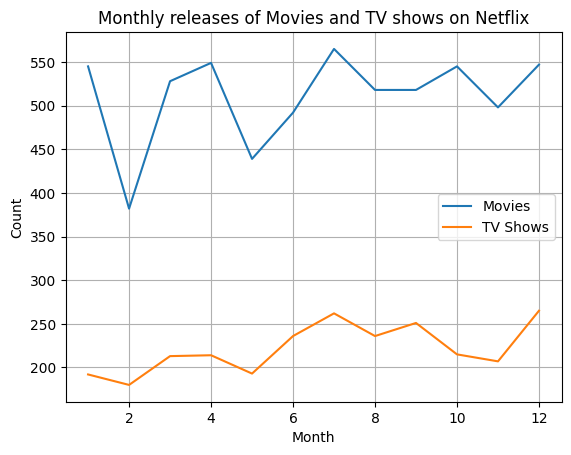

In [ ]:
#Monthly releases of Movies and TV shows on Netflix

monthly=data[data['type']=='Movie']['month'].value_counts().sort_index()

monthly1=data[data['type']=='TV Show']['month'].value_counts().sort_index()
# Corrected labels in the plot calls
plt.plot(monthly.index,monthly.values,label="Movies")
plt.plot(monthly1.index,monthly1.values,label="TV Shows")

plt.legend()
plt.title("Monthly releases of Movies and TV shows on Netflix")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid()
plt.show()

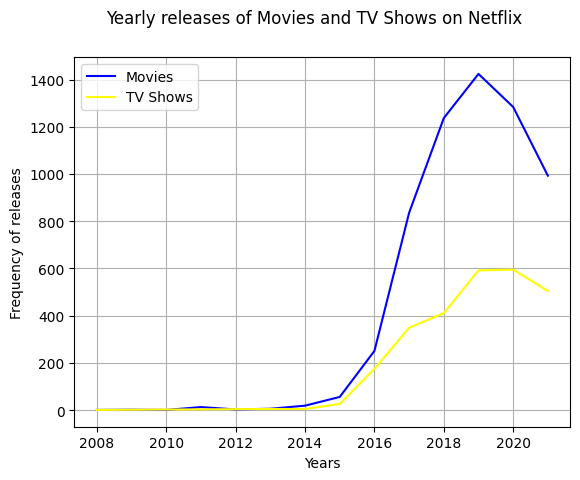

In [ ]:
#On Yearly Basis
yearly=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly1=data[data['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly.index,yearly.values, label='Movies',color='blue')
plt.plot(yearly1.index,yearly1.values, label='TV Shows',color='yellow')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

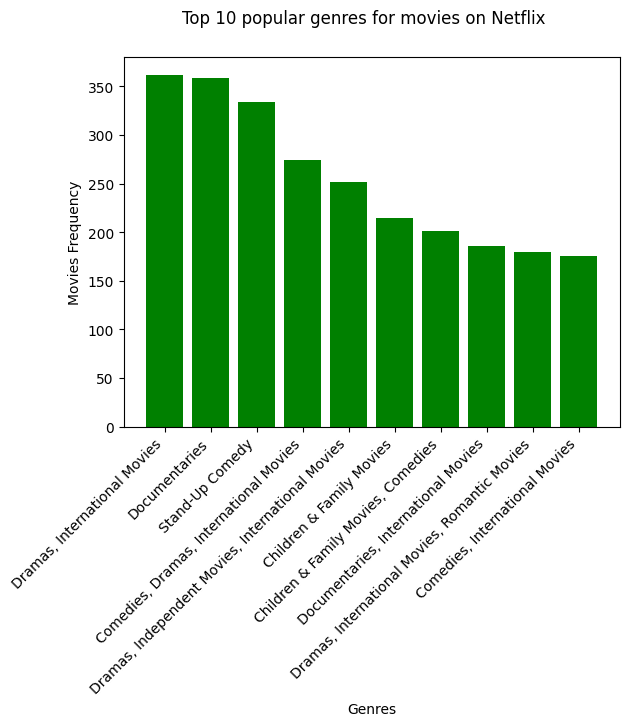

In [ ]:
#TOP 10 GENRES
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.bar(popular_movie_genre.index, popular_movie_genre.values, color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Marcus Raboy'),
  Text(4, 0, 'Suhas Kadav'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Martin Scorsese'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

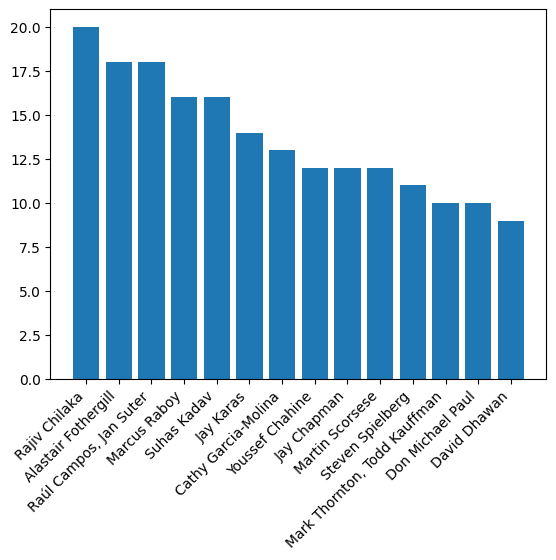

In [ ]:
#TOP DIRECTIORS WITH HIGH COUNT OF MOVIES AND SHOWS
directors=data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')